# Pandas Tutorial: MovieLens DataSet
### Analysis of movies from the movielens dataset
![](Data/Movielens/movies.jpg)

In [5]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the Data and take a quick look.
movie_meta = pd.read_csv('Data/Imdb/movie_metadata.csv')
movie_meta.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [9]:
# Information about the dataset
movie_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [10]:
# Some stats about the numeric columns in our dataset
movie_meta.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
# Name of columns
movie_meta.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

## Cleaning the Dataset
In this section we are going to clean the Data and get ir ready for all the analysis.
The steps we are going to take are:

* Keep the columns we are interested in using
* Clean Null values from the dataset, we just remove the whole movie if it has a null value in a column.
* Convert year to INT (from float)

In [12]:
# Clean NAs
print(len(movie_meta))
movie_meta.dropna(inplace=True)
print(len(movie_meta))

5043
3756


In [13]:
movies = movie_meta[['movie_title', 'title_year', 'director_name','duration', 'genres', \
                     'num_voted_users', 'budget','gross', 'imdb_score',\
                     'actor_1_name','actor_2_name']]

In [15]:
# Keep only interesting columns

#movies.loc[:,['title_year']] = movies.loc[:,['title_year']].astype(int)
movies.loc[:,'title_year'] = movies['title_year'].apply(lambda x: int(x))
movies.head()

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name
0,Avatar,2009,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski,169.0,Action|Adventure|Fantasy,471220,300000000.0,309404152.0,7.1,Johnny Depp,Orlando Bloom
2,Spectre,2015,Sam Mendes,148.0,Action|Adventure|Thriller,275868,245000000.0,200074175.0,6.8,Christoph Waltz,Rory Kinnear
3,The Dark Knight Rises,2012,Christopher Nolan,164.0,Action|Thriller,1144337,250000000.0,448130642.0,8.5,Tom Hardy,Christian Bale
5,John Carter,2012,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,212204,263700000.0,73058679.0,6.6,Daryl Sabara,Samantha Morton


## Quick Statistics and Queries
Now we run some quick stats like best movies or best movies by a genre. 

In [16]:
# Top five movies
movies.sort_values('imdb_score',ascending=False).head(5)

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name
1937,The Shawshank Redemption,1994,Frank Darabont,142.0,Crime|Drama,1689764,25000000.0,28341469.0,9.3,Morgan Freeman,Jeffrey DeMunn
3466,The Godfather,1972,Francis Ford Coppola,175.0,Crime|Drama,1155770,6000000.0,134821952.0,9.2,Al Pacino,Marlon Brando
66,The Dark Knight,2008,Christopher Nolan,152.0,Action|Crime|Drama|Thriller,1676169,185000000.0,533316061.0,9.0,Christian Bale,Heath Ledger
2837,The Godfather: Part II,1974,Francis Ford Coppola,220.0,Crime|Drama,790926,13000000.0,57300000.0,9.0,Robert De Niro,Al Pacino
339,The Lord of the Rings: The Return of the King,2003,Peter Jackson,192.0,Action|Adventure|Drama|Fantasy,1215718,94000000.0,377019252.0,8.9,Orlando Bloom,Billy Boyd


In [17]:
# Top five Thriller movies
movies.loc[movies.genres.str.contains('Thriller'),:].sort_values('imdb_score',ascending=False).head(5)

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name
66,The Dark Knight,2008,Christopher Nolan,152.0,Action|Crime|Drama|Thriller,1676169,185000000.0,533316061.0,9.0,Christian Bale,Heath Ledger
97,Inception,2010,Christopher Nolan,148.0,Action|Adventure|Sci-Fi|Thriller,1468200,160000000.0,292568851.0,8.8,Leonardo DiCaprio,Tom Hardy
2158,The Silence of the Lambs,1991,Jonathan Demme,138.0,Crime|Drama|Horror|Thriller,887467,19000000.0,130727000.0,8.6,Anthony Hopkins,Scott Glenn
3592,The Usual Suspects,1995,Bryan Singer,106.0,Crime|Drama|Mystery|Thriller,740918,6000000.0,23272306.0,8.6,Kevin Spacey,Chazz Palminteri
1600,Se7en,1995,David Fincher,127.0,Crime|Drama|Mystery|Thriller,1023511,33000000.0,100125340.0,8.6,Morgan Freeman,Brad Pitt


## Are Longer Movies Better or Worst? 

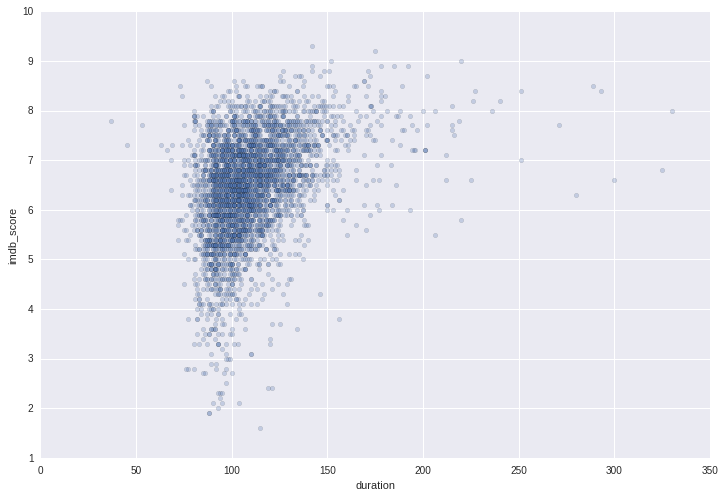

In [18]:
# Are longer movies better or worst? 
movies.plot.scatter('duration','imdb_score',alpha=0.25,figsize=(12,8));

## Top Directors

In [19]:
# Top directors
grouped = movies.loc[:,['director_name','imdb_score']].groupby('director_name').\
    agg([np.mean,np.size])
top20 = grouped.loc[grouped[('imdb_score','size')]>5,:].sort_values(('imdb_score','mean'), ascending=False).head(20)    
top20.head()

imdb_score      
                        mean  size
director_name                     
Christopher Nolan   8.425000   8.0
Quentin Tarantino   8.200000   8.0
James Cameron       7.914286   7.0
David Fincher       7.750000  10.0
Martin Scorsese     7.675000  16.0

## Are Movies Getting Better?

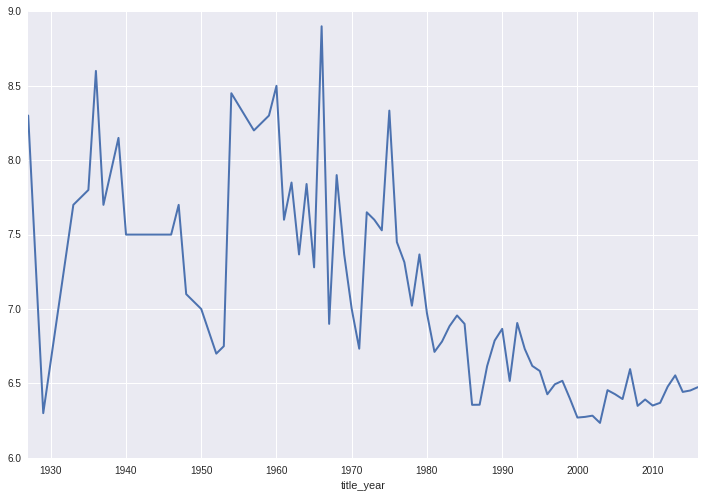

In [20]:
# Are movies getting better?
movies.groupby('title_year').mean().loc[:,'imdb_score'].plot(linewidth=2,figsize=(12,8));

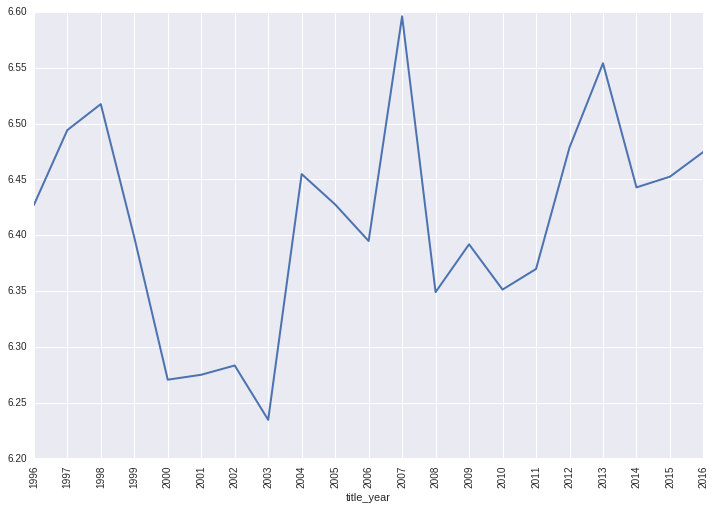

In [21]:
# In the last 20 years?
movies.loc[movies.title_year>1995,:].groupby('title_year').\
    mean().loc[:,'imdb_score'].plot(rot=90,xticks=range(1996,2017),linewidth=2,figsize=(12,8));

## Are Movies getting longer or shorter?

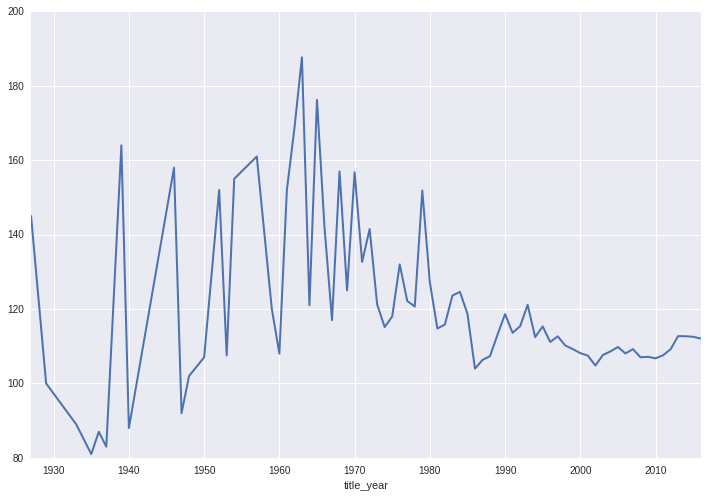

In [22]:
# Movie length by time, are movies getting longer or shorter ? 
movies.groupby('title_year').mean().loc[:,'duration'].plot(linewidth=2,figsize=(12,8));

## Histogram of Ratings

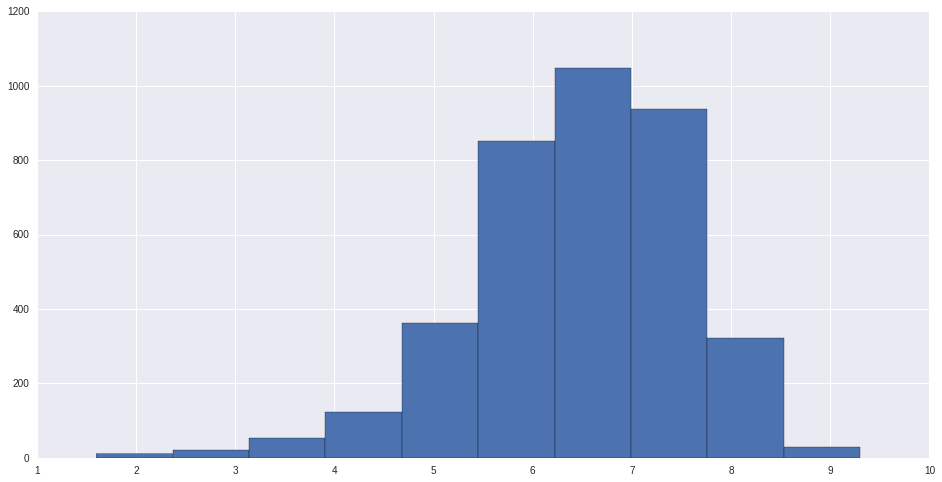

In [23]:
# Histogram of ratings
movies['imdb_score'].hist(figsize=(16,8));

## Histogram of Directors
How many movies are directed by directors?

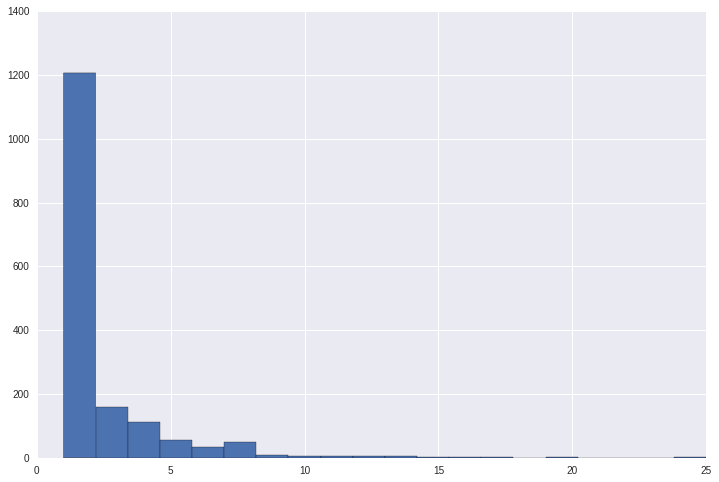

In [54]:
# Histogram of directors
directors_hist = movies['director_name'].value_counts()
directors_hist.hist(figsize=(12,8),bins=20,);

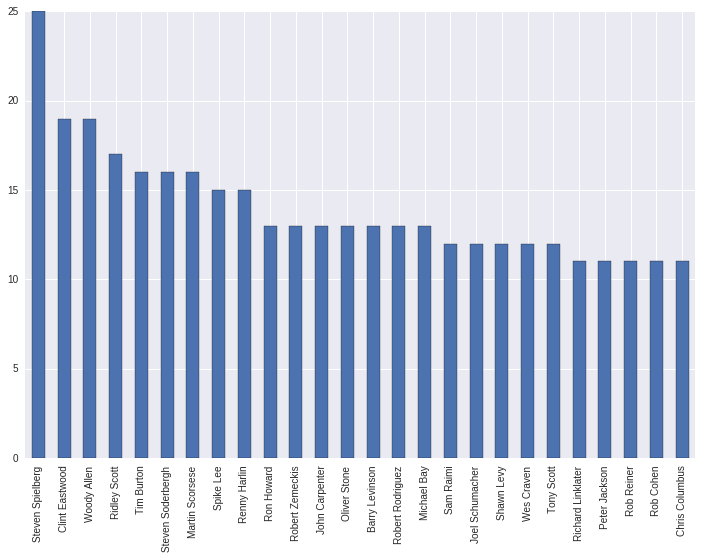

In [55]:
# Histogram of directors
directors_hist = movies['director_name'].value_counts()
directors_hist = directors_hist[directors_hist > 10]
directors_hist.plot(kind='bar',rot=90,figsize=(12,8));

## Histogram of Genres (Categories)

In [56]:
movies.loc[:,'genres'] = movies['genres'].str.split('|')

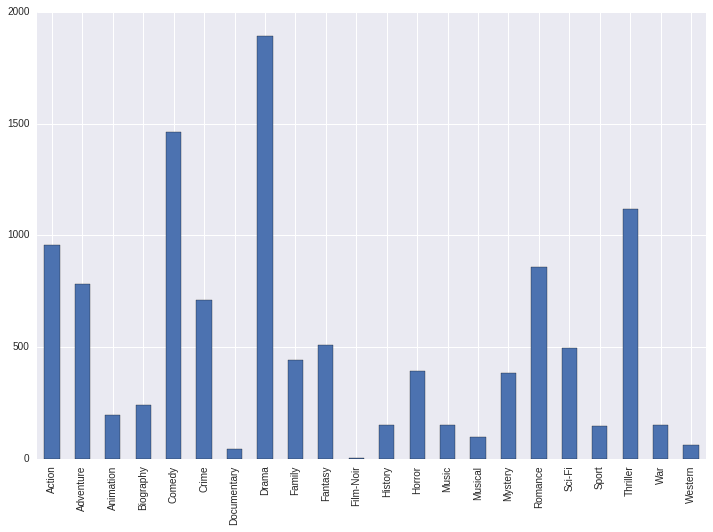

In [57]:
# Histogram of Movie Genres
from pandas import Series
# Notar el uso de apply que toma una columna (en este caso una lista de listas) 
# a cada valor le aplica Series y luego value_counts y sum
movie_genres = movies['genres'].apply(lambda x: Series(x).value_counts()).sum()
movie_genres.plot(kind='bar',figsize=(12,8));

## Showing how to use Bokeh, analyze gross vs Budget

In [58]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [59]:
from bokeh.io import show
from bokeh.plotting import figure

In [60]:
p = figure(height=300,width=900)
p.circle(x=movies.gross,y=movies.budget,color='pink')
show(p)

## Correlation between columns

In [61]:
# Relationship between columns
print(movies['budget'].corr(movies['gross']))
movies.corr()

0.0994964232702


,title_year,duration,num_voted_users,budget,gross,imdb_score
title_year,1.000000,-0.130211,0.023687,0.047138,0.054808,-0.134982
duration,-0.130211,1.000000,0.339592,0.068012,0.245726,0.366221
num_voted_users,0.023687,0.339592,1.000000,0.065927,0.624949,0.482430
budget,0.047138,0.068012,0.065927,1.000000,0.099496,0.029190
gross,0.054808,0.245726,0.624949,0.099496,1.000000,0.214740
imdb_score,-0.134982,0.366221,0.482430,0.029190,0.214740,1.000000


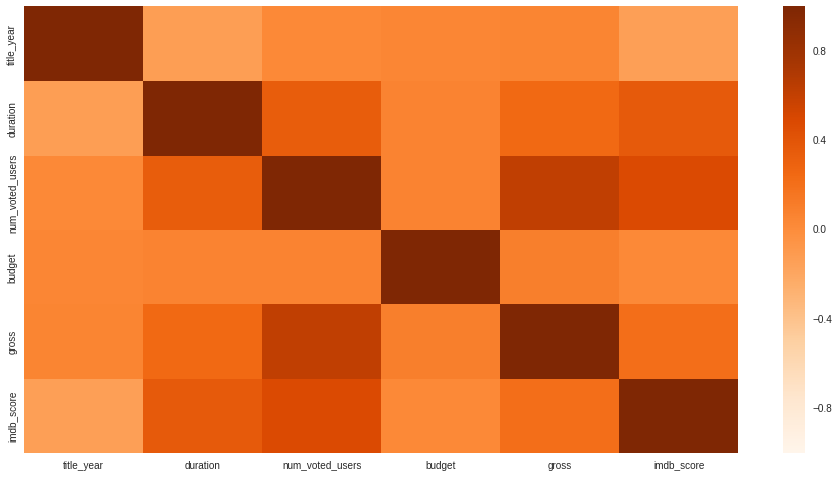

In [62]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
sns.heatmap(movies.corr(),cmap='Oranges');

### Score by Votes

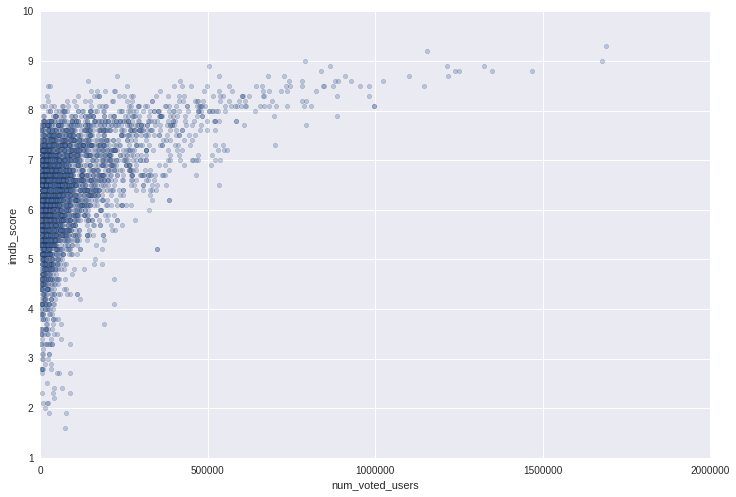

In [64]:
fig = plt.figure()
ax = plt.subplot(111)
movies.plot.scatter('num_voted_users','imdb_score',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,2000000);

## Budget/Gross Relationship

In [65]:
# Best budget/gross relationship
movies.loc[:,'bgr']=movies.loc[:,'gross']-movies.loc[:,'budget']
movies.sort_values('bgr',ascending=False).head()

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name,bgr
0,Avatar,2009,James Cameron,178.0,"[Action, Adventure, Fantasy, Sci-Fi]",886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore,523505847.0
29,Jurassic World,2015,Colin Trevorrow,124.0,"[Action, Adventure, Sci-Fi, Thriller]",418214,150000000.0,652177271.0,7.0,Bryce Dallas Howard,Judy Greer,502177271.0
26,Titanic,1997,James Cameron,194.0,"[Drama, Romance]",793059,200000000.0,658672302.0,7.7,Leonardo DiCaprio,Kate Winslet,458672302.0
3024,Star Wars: Episode IV - A New Hope,1977,George Lucas,125.0,"[Action, Adventure, Fantasy, Sci-Fi]",911097,11000000.0,460935665.0,8.7,Harrison Ford,Peter Cushing,449935665.0
3080,E.T. the Extra-Terrestrial,1982,Steven Spielberg,120.0,"[Family, Sci-Fi]",281842,10500000.0,434949459.0,7.9,Henry Thomas,Dee Wallace,424449459.0


## Score per Budget

In [66]:
# Best score per budget
movies.loc[:,'sbr']=movies.loc[:,'imdb_score']/movies.loc[:,'budget']
movies.loc[(movies.budget>400000) & (movies.imdb_score>7.5)].sort_values('sbr',ascending=False).head()

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name,bgr,sbr
4786,42nd Street,1933,Lloyd Bacon,89.0,"[Comedy, Musical, Romance]",7921,439000.0,2300000.0,7.7,Ginger Rogers,Dick Powell,1861000.0,0.000018
4659,A Separation,2011,Asghar Farhadi,123.0,"[Drama, Mystery]",151812,500000.0,7098492.0,8.4,Shahab Hosseini,Leila Hatami,6598492.0,0.000017
4730,The Station Agent,2003,Tom McCarthy,89.0,"[Comedy, Drama]",58260,500000.0,5739376.0,7.7,Peter Dinklage,Joe Lo Truglio,5239376.0,0.000015
4733,Beyond the Mat,1999,Barry W. Blaustein,108.0,"[Biography, Documentary, Sport]",6790,500000.0,2047570.0,7.6,Terry Funk,Vince McMahon,1547570.0,0.000015
4719,A Hard Day's Night,1964,Richard Lester,87.0,"[Comedy, Musical]",31429,560000.0,515005.0,7.7,Paul McCartney,Ringo Starr,-44995.0,0.000014


## Average Length of Movies by Director

In [67]:
# Average length of movies by director
movies.groupby('director_name').mean().loc[:,'duration'].sort_values(ascending=False).head(10)

director_name
Michael Cimino          325.0
Chatrichalerm Yukol     300.0
Ron Maxwell             275.5
Joseph L. Mankiewicz    251.0
George Stevens          225.0
Bernardo Bertolucci     219.0
Michael Wadleigh        215.0
Akira Kurosawa          202.0
Stanley Kramer          197.0
David Lean              188.0
Name: duration, dtype: float64

In [68]:
# Average length for the Top 20 directors
top20list = list(top20.index)
movies.loc[movies.director_name.isin(top20list)].groupby('director_name').mean().loc[:,'duration'].\
    sort_values(ascending=False).head(10)

director_name
Peter Jackson           169.636364
Francis Ford Coppola    164.888889
James Cameron           156.857143
Martin Scorsese         150.187500
Quentin Tarantino       148.000000
Paul Thomas Anderson    148.000000
David Fincher           141.900000
Christopher Nolan       140.250000
Steven Spielberg        137.160000
Bryan Singer            130.125000
Name: duration, dtype: float64

In [69]:
# And bottom 10
movies.loc[movies.director_name.isin(top20list)].groupby('director_name').mean().loc[:,'duration'].\
    sort_values().head(10)

director_name
Wes Anderson          99.000000
Darren Aronofsky     106.166667
Danny Boyle          107.888889
Richard Linklater    108.909091
Paul Greengrass      116.142857
Gus Van Sant         117.666667
Terry Gilliam        118.857143
Robert Zemeckis      121.769231
Sam Mendes           126.875000
Edward Zwick         127.250000
Name: duration, dtype: float64

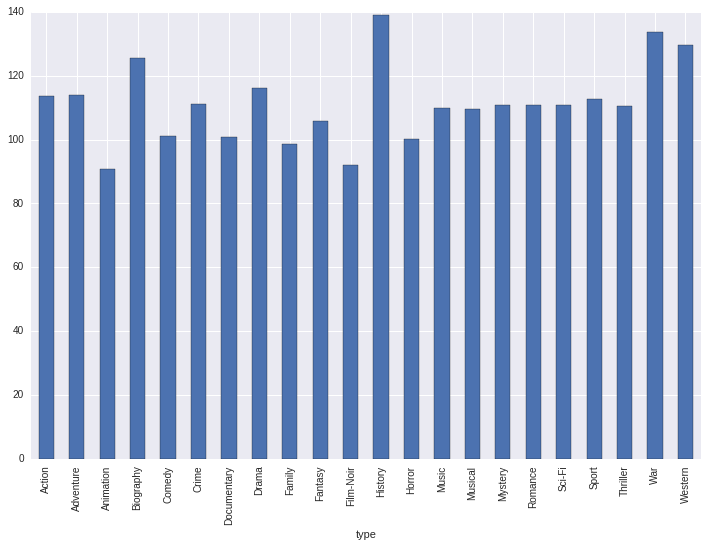

In [70]:
# Average some stats by genre (but each movie can have multiple genres so its not so easy!)
df1 = pd.DataFrame(movies['genres'].tolist(), index = movies['duration']).stack().reset_index(name='type')
df1.groupby('type').mean()['duration'].plot(kind='bar',figsize=(12,8));

## Top Pairs of Actors

In [71]:
# Top pairs of actors
# Actors that acted together in more number of movies and the average score, just in case
actors_1 = movies.loc[:,['actor_1_name','actor_2_name','imdb_score']]
actors_2 = movies.loc[:,['actor_1_name','actor_2_name','imdb_score']]
actors = pd.merge(actors_1,actors_2,how='inner',left_on=['actor_1_name', 'actor_2_name'],right_on=['actor_1_name', 'actor_2_name'])
actors.loc[:,'avg']= (actors.loc[:, 'imdb_score_x'] + actors.loc[:,'imdb_score_y'])/2
grouped = actors.groupby(['actor_1_name','actor_2_name']).agg([np.mean,np.size]).reset_index()
grouped = pd.DataFrame(grouped.to_records()) # multiindex become columns and new index is integers only
grouped.columns=['in', 'actor1', 'actor2', 's1', 's2', 's3', 's4', 'mean', 'size']
grouped = grouped[['actor1','actor2','mean','size']]
grouped.sort_values(by=['size', 'mean'],ascending=False).head()

,actor1,actor2,mean,size
3151,Steve Buscemi,Adam Sandler,6.233333,36.0
2695,Paul Walker,Vin Diesel,6.850000,16.0
1343,J.K. Simmons,James Franco,6.750000,16.0
2048,Leonard Nimoy,Nichelle Nichols,6.425000,16.0
2881,Robert Pattinson,Kristen Stewart,5.125000,16.0


In [72]:
# Most succcesful pairs of actors acting in 2 or more movies
grouped.loc[grouped['size'] >= 2].sort_values(by=['mean', 'size'],ascending=False).head()

,actor1,actor2,mean,size
666,Christopher Lee,Orlando Bloom,8.750000,4.0
2067,Leonardo DiCaprio,Tom Hardy,8.450000,4.0
1448,Jason Statham,Brad Pitt,8.300000,4.0
693,Clint Eastwood,Morgan Freeman,8.200000,4.0
3316,Tom Hanks,John Ratzenberger,8.166667,9.0


## Best Actors

In [73]:
# Let's get an average of actor scores either in actor 1 or 2
actor1=movies.loc[: , ['actor_1_name','imdb_score']]
actor2=movies.loc[: , ['actor_2_name','imdb_score']]
#actor1.set_index('actor_1_name',inplace=True)
#actor2.set_index('actor_2_name',inplace=True)
#actor1.imdb_score.mean(actor2.imdb_score,fill_value=0)
actor_score = pd.merge(actor1,actor2,how='outer', left_on='actor_1_name', right_on='actor_2_name')
def promediar(x):
    if np.isnan(x[1]):
        return x[3]
    if np.isnan(x[3]):
        return x[1]
    return (x[1]+x[3])/2
def the_actor(x):
    if pd.isnull(x[0]):
        return x[2]
    else:
        return x[0]
actor_score['avg'] = actor_score.apply(promediar,axis=1)
actor_score['name'] = actor_score.apply(the_actor,axis=1)
actor_score = actor_score.loc[:,['name','avg']].groupby('name').agg([np.mean,np.size])
actor_score.columns = actor_score.columns.droplevel(0)
# Bonus most prolific actors
#actor_score.reset_index(inplace=True)
actor_score.sort_values('size', ascending=False).head()

,mean,size
name,,
Morgan Freeman,6.917727,440.0
Bruce Willis,6.716858,261.0
Brad Pitt,7.158613,238.0
Robert De Niro,6.674762,210.0
Will Ferrell,6.280833,180.0


In [74]:
# Best actors with more than 10 movies
actor_score.loc[actor_score['size'] >= 10].sort_values('mean', ascending=False).head()

,mean,size
name,,
John Ratzenberger,7.966667,18.0
Tom Hardy,7.869444,18.0
Orlando Bloom,7.710714,14.0
Leonardo DiCaprio,7.647619,21.0
Clint Eastwood,7.441667,12.0


In [75]:
# Worst actors with more than 10 movies
actor_score.loc[actor_score['size'] >= 10].sort_values('mean', ascending=True).head()

,mean,size
name,,
Carmen Electra,3.763333,15.0
Diedrich Bader,5.200000,10.0
Alexa PenaVega,5.428571,14.0
Donald Faison,5.495000,10.0
Rip Torn,5.541667,12.0


## Best Director-Actor Combo

In [76]:
# Best director-actor combo
da1 = movies[['director_name', 'actor_1_name','imdb_score']]
da2 = movies[['director_name', 'actor_2_name','imdb_score']]
da = pd.merge(da1,da2,how='outer', left_on=['director_name', 'actor_1_name'], right_on = ['director_name','actor_2_name'])
da['actor'] = da.apply(lambda x: x[1] if not pd.isnull(x[1]) else x[3],axis=1)
da['score'] = da.apply(lambda x: np.nanmean([x[2], x[4]]),axis=1)
da = da.groupby(['director_name','actor']).mean().reset_index()
da = da[['director_name', 'actor','score']]#.drop_duplicates()
da.sort_values('score',ascending=False).head()

,director_name,actor,score
1847,Frank Darabont,Morgan Freeman,9.3
1819,Francis Ford Coppola,Robert De Niro,9.0
1015,Christopher Nolan,Heath Ledger,9.0
1845,Frank Darabont,Jeffrey DeMunn,8.9
4901,Peter Jackson,Billy Boyd,8.9


## Can Directors make actors better?

In [77]:
# Which directors make actors better? 
# We have to create pairs of director-actor
da2 = pd.merge(da,actor_score,how='inner',left_on='actor',right_index=True)
da2.loc[:,'dif']=da2['score']-da2['mean']
da2 = da2.groupby('director_name').agg([np.size,np.mean])
da2.columns = da2.columns.droplevel(0)
da2.columns=['s1', 'm1', 's2', 'm2', 's3', 'm3', 'count', 'mean']
da2=da2[['count','mean']]
da2.loc[da2['count'] >= 5,:].sort_values('mean', ascending=False).head()

,count,mean
director_name,,
Christopher Nolan,12.0,1.366056
Quentin Tarantino,15.0,1.204973
Dean DeBlois,5.0,1.128947
Peter Weir,8.0,1.116113
Pete Docter,5.0,1.038810


In [78]:
# Which directors make actors worst?
da2.loc[da2['count'] >= 5,:].sort_values('mean', ascending=True).head()

,count,mean
director_name,,
Jason Friedberg,5.0,-2.316000
Uwe Boll,6.0,-1.704972
Tom Dey,6.0,-1.202518
Mark Neveldine,9.0,-1.053938
Peter Hyams,10.0,-0.968000


## Movie Score across time by movie duration

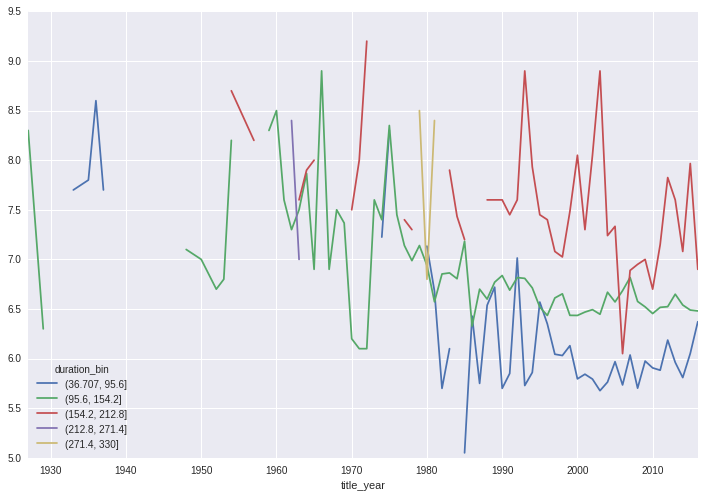

In [79]:
# For different movie durations how does score change accross time?
movies.loc[:,'duration_bin']  = pd.cut(movies['duration'],bins=5)
pd.pivot_table(movies, values='imdb_score', columns='duration_bin', index='title_year').plot(figsize=(12,8));

## Score by Director and Duration

In [80]:
top10 = top20.head(5)
top10 = list(top10.index)
pd.pivot_table(movies.loc[movies.director_name.isin(top10),:],values='imdb_score',columns='director_name', \
               index='duration_bin')

director_name,Christopher Nolan,David Fincher,James Cameron,Martin Scorsese,Quentin Tarantino
duration_bin,,,,,
"(36.707, 95.6]",NaN,NaN,NaN,NaN,NaN
"(95.6, 154.2]",8.383333,7.742857,8.050000,7.618182,8.060000
"(154.2, 212.8]",8.550000,7.766667,7.733333,7.766667,8.433333
"(212.8, 271.4]",NaN,NaN,NaN,7.850000,NaN
"(271.4, 330]",NaN,NaN,NaN,NaN,NaN


## Analysys of Genres

In [81]:
import itertools

def melt_series(s):
    lengths = s.str.len().values
    flat = [i for i in itertools.chain.from_iterable(s.values.tolist())]
    idx = np.repeat(s.index.values, lengths)
    return pd.Series(flat, idx, name=s.name)

multi_movies = melt_series(movies['genres']).to_frame().join(movies.drop('genres', 1)).reindex_axis(movies.columns, 1)
multi_movies.head(6)

,movie_title,title_year,director_name,duration,genres,num_voted_users,budget,gross,imdb_score,actor_1_name,actor_2_name,bgr,sbr,duration_bin
0,Avatar,2009,James Cameron,178.0,Action,886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore,523505847.0,3.333333e-08,"(154.2, 212.8]"
0,Avatar,2009,James Cameron,178.0,Adventure,886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore,523505847.0,3.333333e-08,"(154.2, 212.8]"
0,Avatar,2009,James Cameron,178.0,Fantasy,886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore,523505847.0,3.333333e-08,"(154.2, 212.8]"
0,Avatar,2009,James Cameron,178.0,Sci-Fi,886204,237000000.0,760505847.0,7.9,CCH Pounder,Joel David Moore,523505847.0,3.333333e-08,"(154.2, 212.8]"
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski,169.0,Action,471220,300000000.0,309404152.0,7.1,Johnny Depp,Orlando Bloom,9404152.0,2.366667e-08,"(154.2, 212.8]"
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski,169.0,Adventure,471220,300000000.0,309404152.0,7.1,Johnny Depp,Orlando Bloom,9404152.0,2.366667e-08,"(154.2, 212.8]"


## Heatmap by Genre and Year

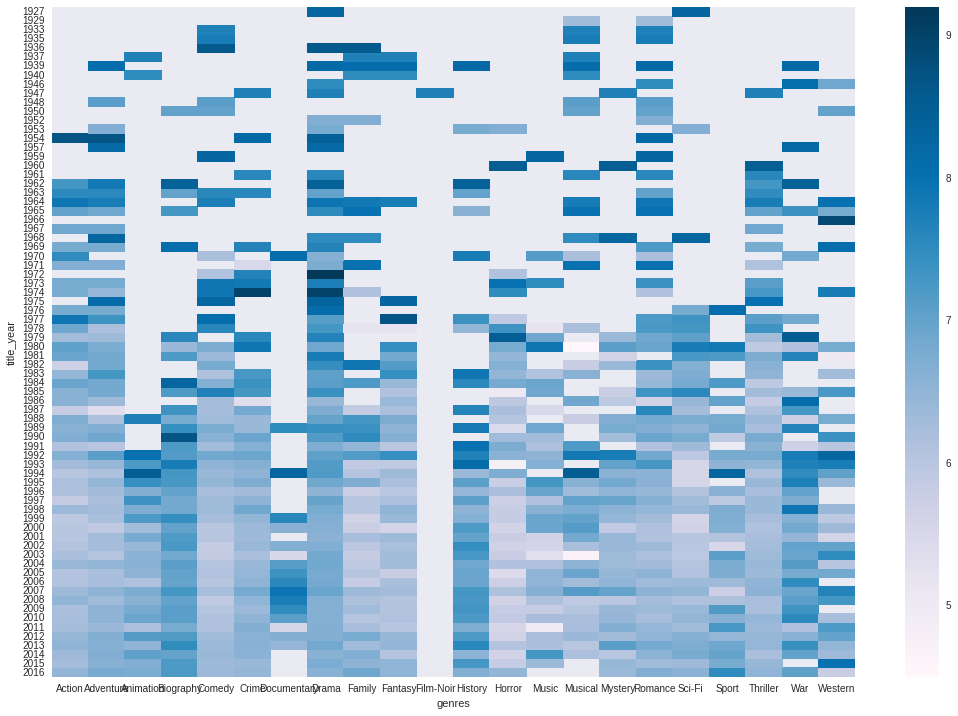

In [82]:
# Heatmap by Genre and Year
pivoted = pd.pivot_table(multi_movies,values='imdb_score',columns='genres', \
               index='title_year')
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pivoted,cmap='PuBu');

## Duration, Budget, Gross and Score by Genre

In [83]:
categs = multi_movies.groupby('genres').mean()[['duration','budget','gross','imdb_score']]
categs.head()    

,duration,budget,gross,imdb_score
genres,,,,
Action,113.586027,7.179386e+07,7.792268e+07,6.289781
Adventure,113.950064,8.717373e+07,1.010171e+08,6.449808
Animation,90.959184,1.085251e+08,1.095878e+08,6.702551
Biography,125.594142,2.843868e+07,3.627609e+07,7.157741
Comedy,101.006160,4.270170e+07,5.153227e+07,6.187817


## Best Genres by Score

In [84]:
categs.sort_values('imdb_score',ascending=False)

,duration,budget,gross,imdb_score
genres,,,,
Film-Noir,92.000000,2.300000e+06,7.927000e+03,7.700000
Biography,125.594142,2.843868e+07,3.627609e+07,7.157741
History,139.067114,4.848787e+07,3.792400e+07,7.155034
War,133.855263,6.677847e+07,4.240605e+07,7.056579
Documentary,100.733333,5.552478e+06,1.933457e+07,6.988889
Western,129.644068,4.350371e+07,4.421998e+07,6.793220
Drama,116.362916,4.099697e+07,3.819885e+07,6.789171
Animation,90.959184,1.085251e+08,1.095878e+08,6.702551
Musical,109.708333,4.318027e+07,5.907849e+07,6.596875


## Best Genres by Gross-Budget score

In [85]:
# Best Categories in Gross Minus Budget difference
categs['gbr']=categs['gross']-categs['budget']
categs.sort_values('gbr', ascending=False)

,duration,budget,gross,imdb_score,gbr
genres,,,,,
Family,98.556561,7.092124e+07,9.340105e+07,6.213575,2.247980e+07
Fantasy,105.767258,7.024449e+07,8.762389e+07,6.277515,1.737940e+07
Music,110.092715,2.307315e+07,3.982592e+07,6.343709,1.675277e+07
Musical,109.708333,4.318027e+07,5.907849e+07,6.596875,1.589822e+07
Adventure,113.950064,8.717373e+07,1.010171e+08,6.449808,1.384340e+07
Documentary,100.733333,5.552478e+06,1.933457e+07,6.988889,1.378209e+07
Sport,112.702703,3.309331e+07,4.512828e+07,6.593243,1.203497e+07
Romance,110.976717,3.461070e+07,4.574823e+07,6.438300,1.113753e+07
Mystery,111.033854,3.614579e+07,4.661900e+07,6.473958,1.047322e+07


## Best Genres in Score / Budget

In [86]:
# Best Categories in score per Budget
categs['sbb']=categs['imdb_score']/categs['budget']
categs.sort_values('sbb', ascending=False)

,duration,budget,gross,imdb_score,gbr,sbb
genres,,,,,,
Film-Noir,92.000000,2.300000e+06,7.927000e+03,7.700000,-2.292073e+06,3.347826e-06
Documentary,100.733333,5.552478e+06,1.933457e+07,6.988889,1.378209e+07,1.258697e-06
Music,110.092715,2.307315e+07,3.982592e+07,6.343709,1.675277e+07,2.749390e-07
Biography,125.594142,2.843868e+07,3.627609e+07,7.157741,7.837417e+06,2.516903e-07
Sport,112.702703,3.309331e+07,4.512828e+07,6.593243,1.203497e+07,1.992319e-07
Romance,110.976717,3.461070e+07,4.574823e+07,6.438300,1.113753e+07,1.860205e-07
Mystery,111.033854,3.614579e+07,4.661900e+07,6.473958,1.047322e+07,1.791069e-07
Crime,111.259520,3.830222e+07,3.938520e+07,6.545134,1.082980e+06,1.708813e-07
Drama,116.362916,4.099697e+07,3.819885e+07,6.789171,-2.798120e+06,1.656018e-07


## Are Plot of Categories across time

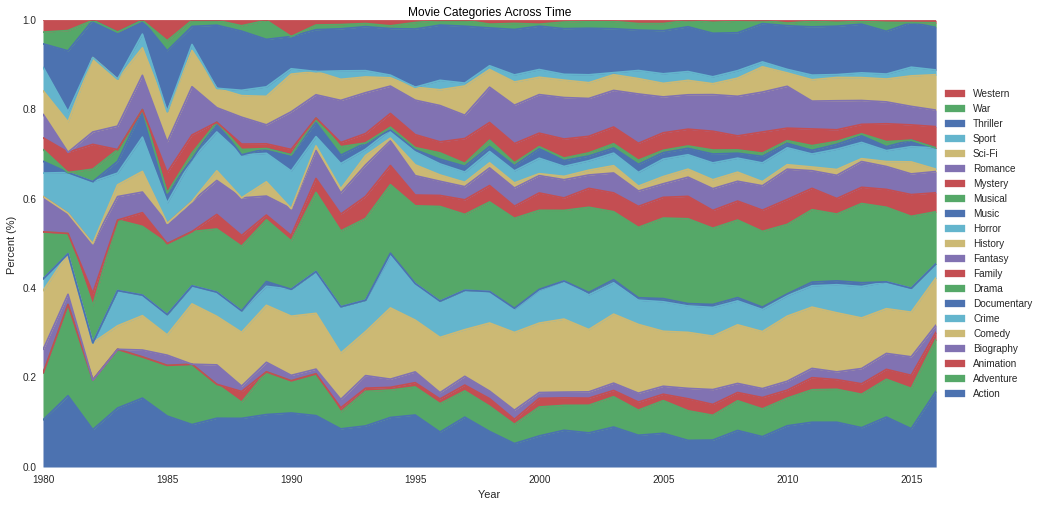

In [87]:
# Movie Categories Across Time, Area Plot
gy = pd.DataFrame(multi_movies.loc[multi_movies.title_year >= 1980].groupby(['genres','title_year']).size())
gy.columns = ['num']
#gy = gy.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='genres', \
              index='title_year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Movie Categories Across Time', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

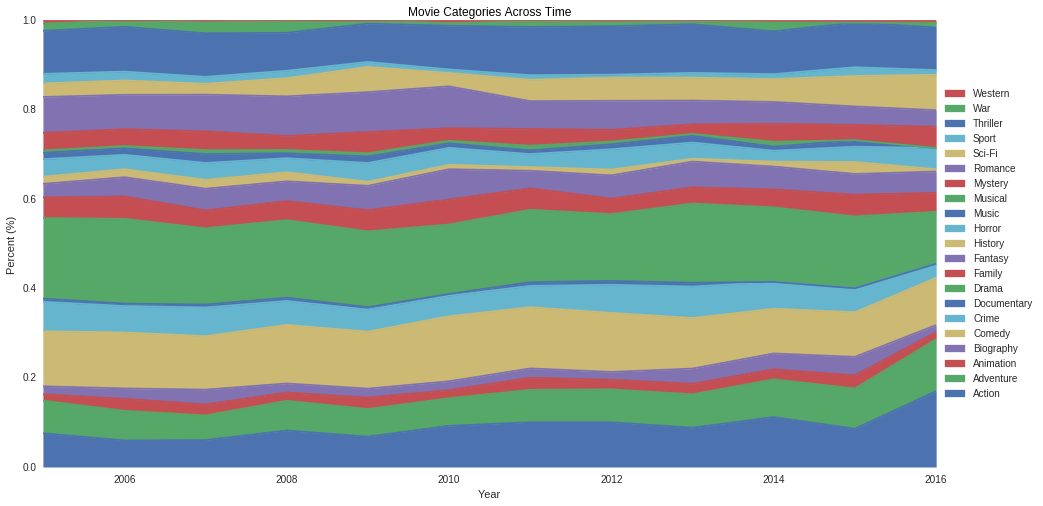

In [88]:
# Movie Categories Across Time, Area Plot
gy = pd.DataFrame(multi_movies.loc[multi_movies.title_year >= 2005].groupby(['genres','title_year']).size())
gy.columns = ['num']
#gy = gy.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='genres', \
              index='title_year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Movie Categories Across Time', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

## HeatMaps Using CrossTab

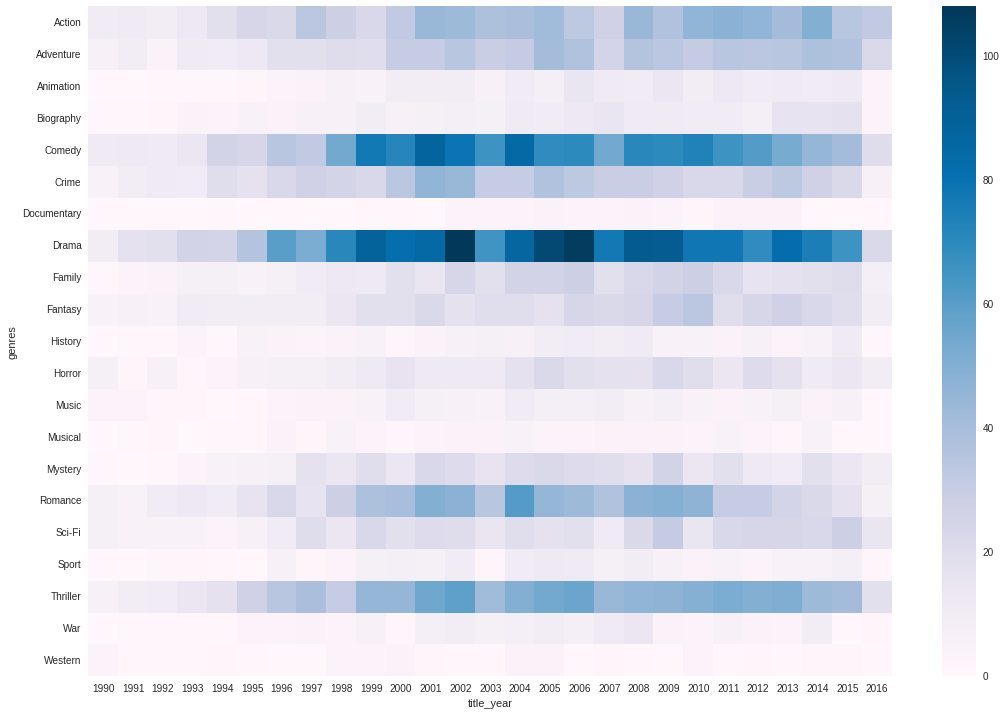

In [89]:
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pd.crosstab(multi_movies.loc[multi_movies.title_year >= 1990].genres,\
                        multi_movies.loc[multi_movies.title_year >= 1990].title_year),cmap='PuBu');

## BoxPlot of Scores by Category

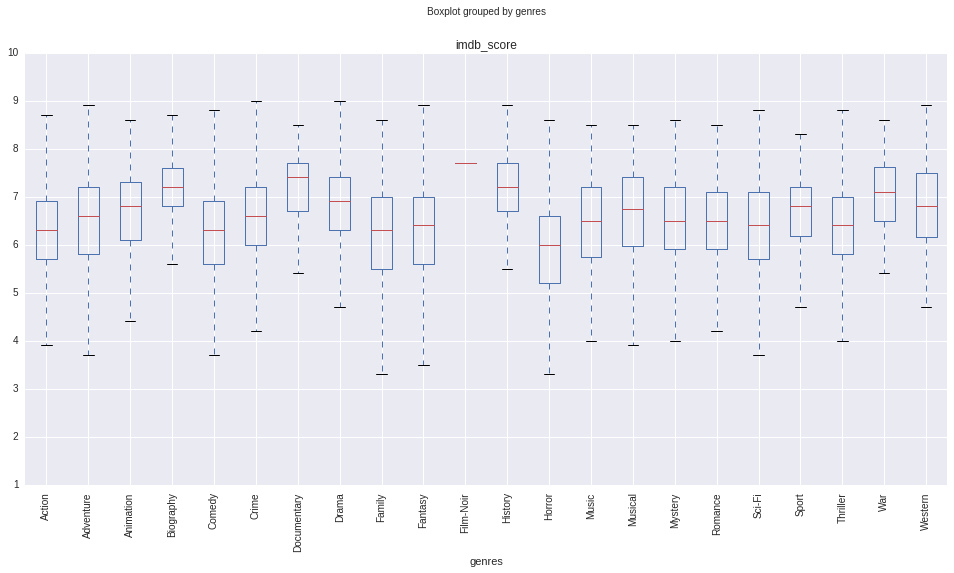

In [94]:
multi_movies.boxplot('imdb_score',by='genres',figsize=(16,8),rot=90);